In [29]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
import seaborn
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [33]:
def gethistoricalData(id):
    url = 'http://members.tsetmc.com/tsev2/data/InstTradeHistory.aspx?i='+str(id)+'&Top=999999&A=0'
    response = requests.get(url)
    responseStr = response.content.decode('utf8')
    data = responseStr.split(';')
    data2=[]
    for i in data:
        if len(i.split('@'))==10:
            data2.append(i.split('@'))
    df = pd.DataFrame.from_records(data2,columns = 'Date High Low Close Last Open Yesterday Value Volume TradeNo'.split())
    return df

def descendingAdjust(df1):
    # df1 = df[::-1]
    # df1 = df1[['ClosingPrice','YesterdayLastTradePrice']]
    df1['newyesterday'] = df1['Yesterday'].shift(1)
    df1 = df1.apply(pd.to_numeric,errors = 'ignore')
    df1['coefficient'] = df1['newyesterday']/df1['Close']
    df1 = df1.dropna()
    df1['adjustedRatio'] = df1['coefficient'].cumprod()
    df1 = df1.drop(columns=['newyesterday','coefficient'])
    df1['adjustedClose'] = df1['Close']*df1['adjustedRatio']
    df1['adjustedOpen'] = df1['Open']*df1['adjustedRatio']
    df1['adjustedHigh'] = df1['High']*df1['adjustedRatio']
    df1['adjustedLow'] = df1['Low']*df1['adjustedRatio']
    df1['adjustedLast'] = df1['Last']*df1['adjustedRatio']
    df1 = df1.drop(columns=['Close','Open','High','Low','Last'])
    df1.rename(columns={"adjustedClose":"Close","adjustedOpen":"Open","adjustedHigh":"High","adjustedLow":"Low","adjustedLast":"Last"},inplace=True)
    # df1['adjustedOpeningPrice'] = df1['OpeningPrice']*df1['adjustedRatio']
    return df1

def addAllDays(df):
    # df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
    df['Date'] = df['Date'].apply(lambda x:str(x))
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.set_index('Date').resample('D').asfreq()
    df = df.interpolate()
    df = df.reset_index('Date')
    # df = df.fillna(0)
    return df

def closeReturn(Ids):
    
    closingGroup = pd.DataFrame()
    for id in Ids:
        closing = gethistoricalData(id)
        adjustedclosing = descendingAdjust(closing)
        adjustedclosing = addAllDays(adjustedclosing)
        adjustedclosing[id]=adjustedclosing['Close']
        adjustedclosing = adjustedclosing.set_index('Date')
        adjustedclosing = adjustedclosing[[id]]
        closingGroup = pd.concat([closingGroup,adjustedclosing],axis=1)
        print(closingGroup)
        Returns = closingGroup.pct_change()
    return closingGroup,Returns 
df= pd.read_csv('isic.csv')

df.dropna(subset = ["tseSIsinCode"], inplace=True)
df=df.loc[df.group_isic == 2410]
Ids = df['tseCode']
Ids = [x[1:] for x in Ids]
closingGroup,Returns = closeReturn(Ids)


            44296315953738727
Date                         
2016-02-21         977.273103
2016-02-22         845.236205
2016-02-23         677.189244
2016-02-24         616.172192
2016-02-25         599.500867
...                       ...
2022-10-12        4104.000000
2022-10-13        4106.666667
2022-10-14        4109.333333
2022-10-15        4112.000000
2022-10-16        4126.000000

[2430 rows x 1 columns]
            44296315953738727  68488673556087148
Date                                            
2001-03-25                NaN        1746.799006
2001-03-26                NaN        1751.198733
2001-03-27                NaN        1755.598460
2001-03-28                NaN        1763.578453
2001-03-29                NaN        1771.558446
...                       ...                ...
2022-10-12        4104.000000      578580.000000
2022-10-13        4106.666667      575090.000000
2022-10-14        4109.333333      571600.000000
2022-10-15        4112.000000      568110.0000

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

            44296315953738727  68488673556087148  56324206651661881  \
Date                                                                  
2001-03-25                NaN        1746.799006                NaN   
2001-03-26                NaN        1751.198733                NaN   
2001-03-27                NaN        1755.598460                NaN   
2001-03-28                NaN        1763.578453         109.422134   
2001-03-29                NaN        1771.558446         109.422134   
...                       ...                ...                ...   
2022-10-12        4104.000000      578580.000000       14230.000000   
2022-10-13        4106.666667      575090.000000       14033.333333   
2022-10-14        4109.333333      571600.000000       13836.666667   
2022-10-15        4112.000000      568110.000000       13640.000000   
2022-10-16        4126.000000      567190.000000       13410.000000   

            48623320733330408  54419429862704331  8977441217024425  \
Date  

In [30]:


closingGroup = closingGroup.reset_index()
closingGroup = closingGroup.iloc[-750:]
data = closingGroup
print(data)
# data[960:980]
data = data.fillna(method='bfill')

farsi_namad_dict = {}
for i in df['coSymbol']:
    # farsi_namad_dict[i] = arabic_reshaper.reshape(i)
    farsi_namad_dict[i] = get_display(reshape(i))

df['farsi_namad'] = df['coSymbol'].map(farsi_namad_dict)
data= data.rename(columns=dict(zip(df['tseCode'].apply(lambda x:x[1:]),df['farsi_namad'])))
data

     index       Date  44296315953738727  68488673556087148  \
0     7126 2020-09-27       19883.545455      238162.753055   
1     7127 2020-09-28       19883.054545      244105.215510   
2     7128 2020-09-29       19882.563636      253444.476164   
3     7129 2020-09-30       19882.072727      255564.573446   
4     7130 2020-10-01       19881.581818      256704.577094   
..     ...        ...                ...                ...   
745   7871 2022-10-12        4104.000000      578580.000000   
746   7872 2022-10-13        4106.666667      575090.000000   
747   7873 2022-10-14        4109.333333      571600.000000   
748   7874 2022-10-15        4112.000000      568110.000000   
749   7875 2022-10-16        4126.000000      567190.000000   

     56324206651661881  48623320733330408  54419429862704331  \
0          9027.457876        1999.110009        3695.954761   
1          9040.011396        1999.110009        3688.774664   
2          9095.394573        1998.366569        35

,index,Date,ﺯﺍﻮﻫﺎﻓ,ﺎﺘﻨﭙﻓ,ﺩﺭﻮﻨﻓ,ﻪﻟﻮﻠﻓ,ﺱﻭﺮﻓ,ﺎﭙﺴﻓ,ﮊﻭﺮﻓ,ﺎﮐﻮﻓ,...,ﯼﻻﻮﻓ,ﺰﻣﺮﻫ,ﻊﻓﺭﺍ,ﺖﻔﻨﻓ,ﻞﯿﺳﻭﺮﻓ,ﻥﺎﻬﺠﻓ,ﺮﯾﺪﻐﻓ,ﺩﻭﺮﻓ,ﮎﺎﻤﻓ,ﺍﺰﻓﺎﻓ
0,7126,2020-09-27,19883.545455,238162.753055,9027.457876,1999.110009,3695.954761,16597.381587,NaN,20754.998508,...,12077.832124,11327.450899,16026.925669,5418.001029,22399.180297,3503.409637,17117.050691,NaN,29744.643136,46297.194007
1,7127,2020-09-28,19883.054545,244105.215510,9040.011396,1999.110009,3688.774664,15777.655582,NaN,20750.624902,...,12077.148241,11036.133392,15226.284451,5355.675464,22399.180297,3503.409637,17117.050691,NaN,29784.515312,46292.938837
2,7128,2020-09-29,19882.563636,253444.476164,9095.394573,1998.366569,3593.638383,16303.439434,NaN,20746.251296,...,12068.713682,11496.282636,14789.927153,5287.945948,22399.180297,3503.409637,17117.050691,NaN,29722.048903,46288.683667
3,7129,2020-09-30,19882.072727,255564.573446,9096.871458,1996.879689,3442.856353,17098.325257,NaN,20741.877690,...,12052.300487,11996.984601,14896.470407,5251.199082,22399.180297,3503.409637,17117.050691,NaN,29659.582494,46285.846888
4,7130,2020-10-01,19881.581818,256704.577094,9178.346265,1992.171236,3470.978399,17345.347067,NaN,20737.504084,...,12049.716928,12080.021125,14886.808396,5273.175149,22399.180297,3503.409637,17117.050691,NaN,29597.116086,46273.869372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,7871,2022-10-12,4104.000000,578580.000000,14230.000000,1497.000000,5040.000000,11300.000000,NaN,13350.000000,...,7510.000000,10800.000000,11230.000000,27250.000000,22700.000000,2738.000000,15940.000000,NaN,NaN,31300.000000
746,7872,2022-10-13,4106.666667,575090.000000,14033.333333,1494.333333,5033.333333,11286.666667,NaN,13336.666667,...,7420.000000,10793.333333,11226.666667,27200.000000,22616.666667,2731.000000,15900.000000,NaN,NaN,31266.666667
747,7873,2022-10-14,4109.333333,571600.000000,13836.666667,1491.666667,5026.666667,11273.333333,NaN,13323.333333,...,7330.000000,10786.666667,11223.333333,27150.000000,22533.333333,2724.000000,15860.000000,NaN,NaN,31233.333333
748,7874,2022-10-15,4112.000000,568110.000000,13640.000000,1489.000000,5020.000000,11260.000000,NaN,13310.000000,...,7240.000000,10780.000000,11220.000000,27100.000000,22450.000000,2717.000000,15820.000000,NaN,NaN,31200.000000


In [26]:
df3 = data.dropna(how='all', axis=1)

In [27]:
df3.drop(['Date'], axis=1, inplace=True)

/tmp/ipykernel_34656/2883842389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['Date'], axis=1, inplace=True)


In [28]:
df3

,ﺯﺍﻮﻫﺎﻓ,ﺎﺘﻨﭙﻓ,ﺩﺭﻮﻨﻓ,ﻪﻟﻮﻠﻓ,ﺱﻭﺮﻓ,ﺎﭙﺴﻓ,ﺎﮐﻮﻓ,ﺪﯾﺪﺴﻓ,ﺮﺠﻓ,ﺎﮐﻮﺗﻭ,...,ﻮﮐﺪﯿﻣ,ﯼﻻﻮﻓ,ﺰﻣﺮﻫ,ﻊﻓﺭﺍ,ﺖﻔﻨﻓ,ﻞﯿﺳﻭﺮﻓ,ﻥﺎﻬﺠﻓ,ﺮﯾﺪﻐﻓ,ﮎﺎﻤﻓ,ﺍﺰﻓﺎﻓ
7126,19883.545455,238162.753055,9027.457876,1999.110009,3695.954761,16597.381587,20754.998508,124896.572417,18899.740397,11974.376933,...,13910.690686,12077.832124,11327.450899,16026.925669,5418.001029,22399.180297,3503.409637,17117.050691,29744.643136,46297.194007
7127,19883.054545,244105.215510,9040.011396,1999.110009,3688.774664,15777.655582,20750.624902,124855.573871,17957.185776,11750.382353,...,13910.690686,12077.148241,11036.133392,15226.284451,5355.675464,22399.180297,3503.409637,17117.050691,29784.515312,46292.938837
7128,19882.563636,253444.476164,9095.394573,1998.366569,3593.638383,16303.439434,20746.251296,122923.642358,17966.307273,11787.714783,...,13910.690686,12068.713682,11496.282636,14789.927153,5287.945948,22399.180297,3503.409637,17117.050691,29722.048903,46288.683667
7129,19882.072727,255564.573446,9096.871458,1996.879689,3442.856353,17098.325257,20741.877690,122631.652709,18376.774607,12254.370159,...,13910.690686,12052.300487,11996.984601,14896.470407,5251.199082,22399.180297,3503.409637,17117.050691,29659.582494,46285.846888
7130,19881.581818,256704.577094,9178.346265,1992.171236,3470.978399,17345.347067,20737.504084,122609.653489,18635.217003,12437.921273,...,13910.690686,12049.716928,12080.021125,14886.808396,5273.175149,22399.180297,3503.409637,17117.050691,29597.116086,46273.869372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,4104.000000,578580.000000,14230.000000,1497.000000,5040.000000,11300.000000,13350.000000,55700.000000,10120.000000,6670.000000,...,14800.000000,7510.000000,10800.000000,11230.000000,27250.000000,22700.000000,2738.000000,15940.000000,NaN,31300.000000
7872,4106.666667,575090.000000,14033.333333,1494.333333,5033.333333,11286.666667,13336.666667,55516.666667,10080.000000,6633.333333,...,14800.000000,7420.000000,10793.333333,11226.666667,27200.000000,22616.666667,2731.000000,15900.000000,NaN,31266.666667
7873,4109.333333,571600.000000,13836.666667,1491.666667,5026.666667,11273.333333,13323.333333,55333.333333,10040.000000,6596.666667,...,14800.000000,7330.000000,10786.666667,11223.333333,27150.000000,22533.333333,2724.000000,15860.000000,NaN,31233.333333
7874,4112.000000,568110.000000,13640.000000,1489.000000,5020.000000,11260.000000,13310.000000,55150.000000,10000.000000,6560.000000,...,14800.000000,7240.000000,10780.000000,11220.000000,27100.000000,22450.000000,2717.000000,15820.000000,NaN,31200.000000


In [20]:
data1 = df3.pct_change()
data2 = 10000 * (1 + data1).cumprod()
# data2=data2.dropna()

In [21]:
data2.drop(['ﻮﮐﺪﯿﻣ','ﺭﺍﻭﺰﺒﺴﻓ','ﻥﺎﻬﺠﻓ','ﺖﻔﻨﻓ'], axis=1, inplace=True)

In [22]:
data2

,ﺯﺍﻮﻫﺎﻓ,ﺎﺘﻨﭙﻓ,ﺩﺭﻮﻨﻓ,ﻪﻟﻮﻠﻓ,ﺱﻭﺮﻓ,ﺎﭙﺴﻓ,ﺎﮐﻮﻓ,ﺪﯾﺪﺴﻓ,ﺮﺠﻓ,ﺎﮐﻮﺗﻭ,...,ﻥﺍﺯﺎﺴﻓ,ﺮﯾﻮﮐ,ﺏﻭﺫ,ﯼﻻﻮﻓ,ﺰﻣﺮﻫ,ﻊﻓﺭﺍ,ﻞﯿﺳﻭﺮﻓ,ﺮﯾﺪﻐﻓ,ﮎﺎﻤﻓ,ﺍﺰﻓﺎﻓ
7126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7127,9999.753108,10249.512671,10013.905930,10000.000000,9980.573094,9506.111250,9997.892746,9996.717400,9501.287001,9812.938426,...,9849.821216,9843.633656,10000.000000,9999.433770,9742.821656,9500.439926,10000.000000,10000.000000,10013.404826,9999.080901
7128,9999.506216,10641.650422,10075.255624,9996.281145,9723.166586,9822.898478,9995.785491,9842.034892,9506.113256,9844.115355,...,9392.133492,9791.511541,10000.000000,9992.450266,10149.046541,9228.174797,10000.000000,10000.000000,9992.403932,9998.161802
7129,9999.259324,10730.669266,10076.891616,9988.843436,9315.201554,10301.820903,9993.678237,9818.656376,9723.294723,10233.826968,...,9299.165673,9888.309754,10000.000000,9978.860745,10591.071820,9294.652459,10000.000000,10000.000000,9971.403038,9997.549070
7130,9999.012431,10778.535846,10167.143831,9965.290690,9391.290270,10450.652698,9991.570983,9816.894981,9860.038610,10387.113536,...,9337.306317,10019.856044,10000.000000,9976.721654,10664.377390,9288.623847,10000.000000,10000.000000,9950.402145,9994.961977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,2064.018215,24293.471274,15763.020106,7488.332274,13636.530547,6808.302828,6432.185478,4459.690040,5354.570903,5570.227192,...,3292.665537,6264.108847,6599.610188,6218.003300,9534.360463,7006.958310,10134.299425,9312.351928,6466.374437,6760.668907
7872,2065.359358,24146.932827,15545.166232,7474.993005,13618.492808,6800.269432,6425.761323,4445.011227,5333.406591,5539.606253,...,3289.293056,6252.645810,6586.386409,6143.486616,9528.475055,7004.878477,10097.095682,9288.983416,6466.374437,6753.469046
7873,2066.700500,24000.394380,15327.312358,7461.653735,13600.455070,6792.236037,6419.337167,4430.332415,5312.242279,5508.985314,...,3285.920575,6241.182773,6573.162630,6068.969932,9522.589648,7002.798644,10059.891940,9265.614904,6466.374437,6746.269186
7874,2068.041642,23853.855933,15109.458485,7448.314466,13582.417331,6784.202641,6412.913012,4415.653603,5291.077967,5478.364375,...,3282.548094,6229.719736,6559.938851,5994.453248,9516.704240,7000.718810,10022.688197,9242.246392,6466.374437,6739.069326


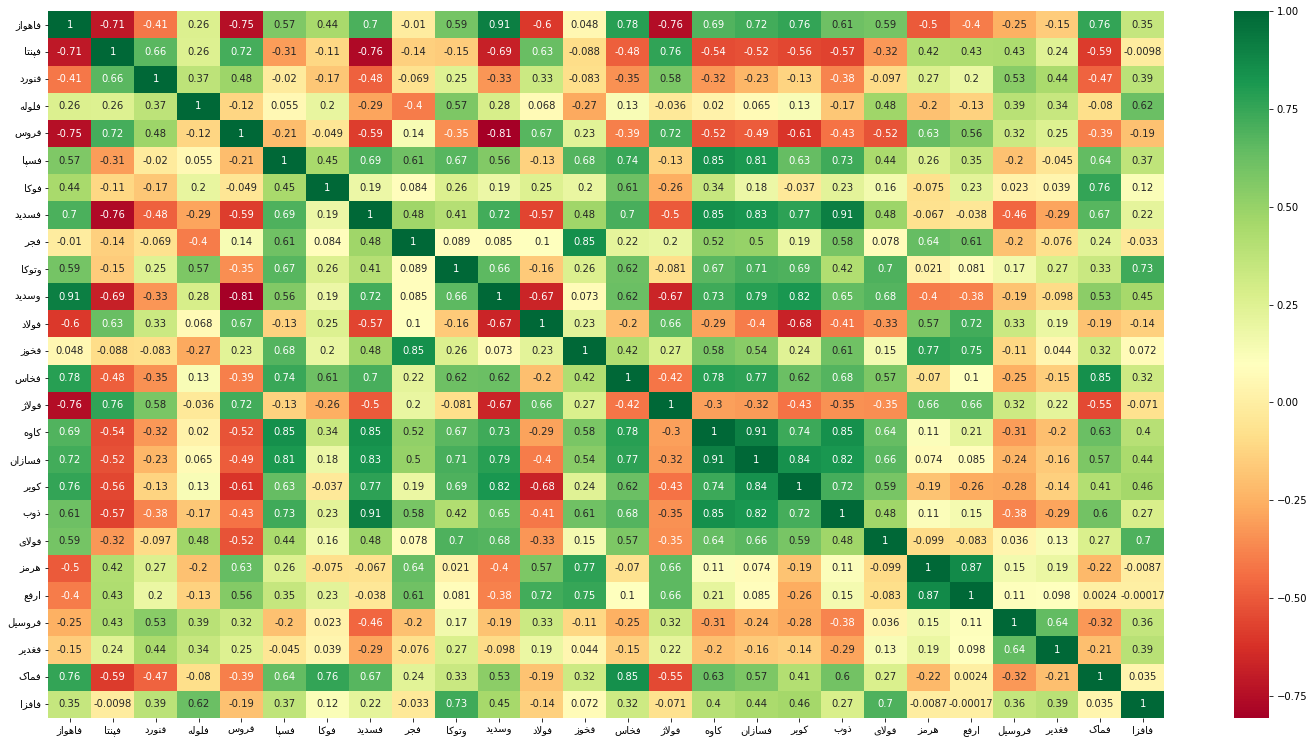

<Figure size 432x288 with 0 Axes>

In [37]:
corr = data2.corr(method='pearson')
corr.head().reset_index()
corr.head(10)
plt.figure(figsize=(25, 13))
seaborn.heatmap(corr, annot=True, cmap='RdYlGn')
plt.figure()
plt.savefig("140.png")ُ 


In [18]:
corr = data2.corr(method='pearson')

Z = linkage(corr, 'average')
c, coph_dists = cophenet(Z, pdist(corr))

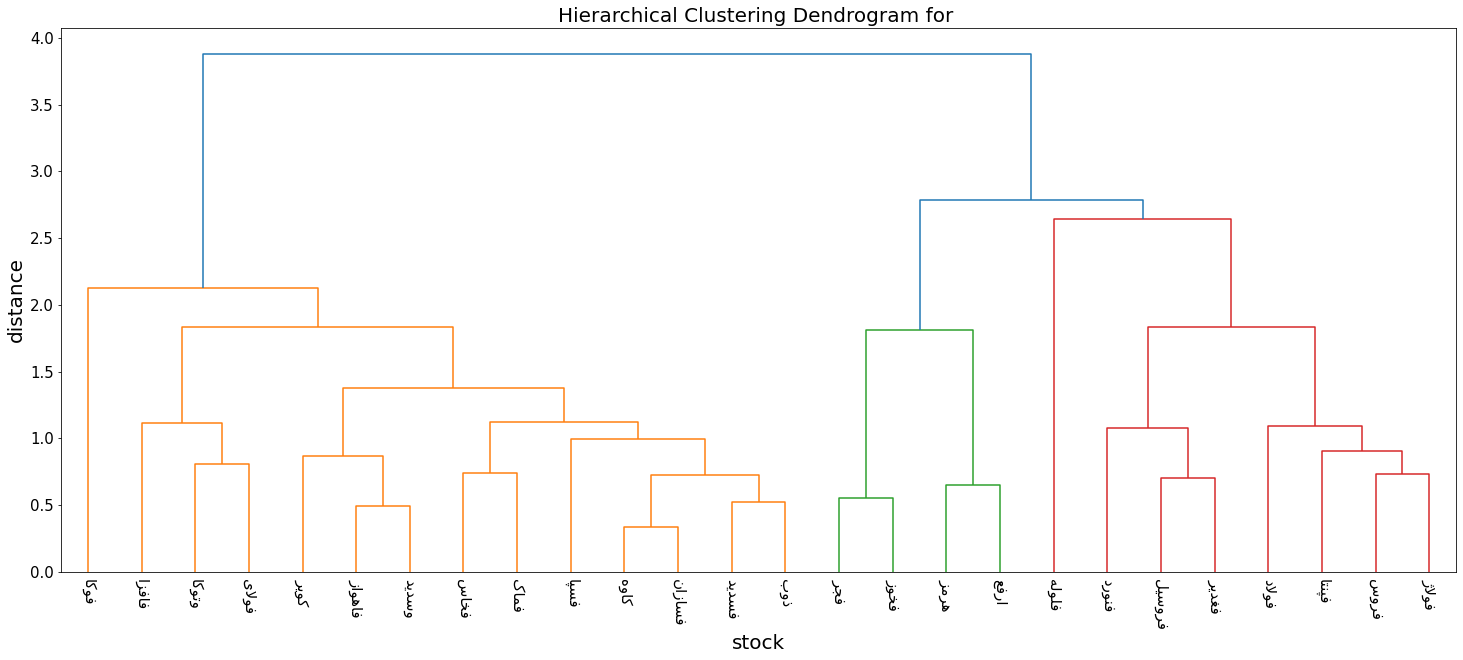

In [19]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for ', fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
# plt.savefig('img/dendogram_.png')
plt.show()